<a href="https://colab.research.google.com/github/DevashishKhatavkar07/HackVH-Sleep-Schedule/blob/main/Sleep_Schedule_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is your age?
17

What time are you going to sleep?
11:00 PM

What time are you going to wake up?
8:30 AM

You will sleep at: 11:00 PM

You will wake up at: 8:30 AM

You will sleep for approximately 9 hours 30 minutes

Results: Perfect amount of sleep! Keep it up!

Average recommended hours according to CDC: 


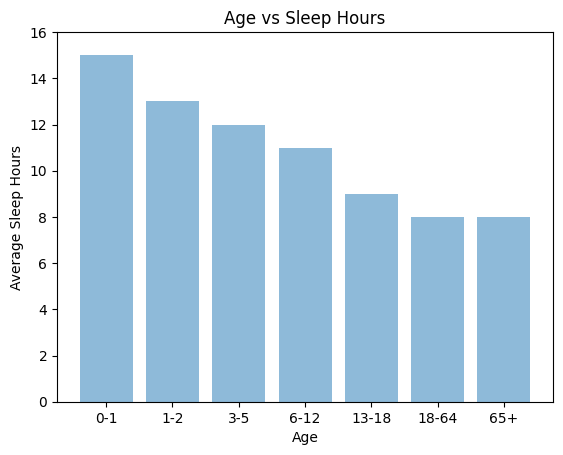

Compare your sleep hours with recommended hours


In [82]:
#imports numpy and matplotlib
import matplotlib.pyplot as plt
import numpy as np

class Sleeper():
    #age is a integer variable, in years (round the age)
    #startSleep and endSleep (12 hour clock) are a string variables and AM and PM specification is necessary. So, 11:30 PM would be "11:30 PM" --> Space is necessary between time and AM or PM, and there should be no other spaces. And time should have a colon
    def __init__(self, age, startSleep=0, endSleep=0):
        self.age = age
        self.start = startSleep
        self.end = endSleep

    #returns age
    def get_age(self):
        return self.age

    #sets age
    def set_age(self, age):
        self.age = age

    #returns start time
    def get_start(self):
        return self.start

    #sets start time
    def set_start(self, startSleep):
        self.start = startSleep

    #returns end time
    def get_end(self):
        return self.end

    #sets end time
    def set_end(self, endSleep):
        self.end = endSleep

    #Based on CDC information
    #This method returns average recommend hours of sleep based on age according to the CDC
    def circadian_rhythm(self, age):
        if age < 1:
            return [13, 16]
        elif age <= 2:
            return [11, 14]
        elif age <= 5:
            return [10, 13]
        elif age <= 12:
            return [9, 12]
        elif age < 18:
            return [8, 10]
        elif age <= 64:
            return [7, 9]
        else:
            return [7, 8]

    #Converts the given time parameter into usable 24 hour clock times and splits the AM and PM
    def convert_time(self, time):
        timeLst = time.split(" ")  #11:30 PM->["11:30", "PM"]
        splitTime = timeLst[0].split(":")  #["11", "30", "PM"]
        if timeLst[1].upper() == "PM":
            splitTime = int(splitTime[0] + splitTime[1])
            splitTime += 1200
        elif timeLst[1].upper() == "AM" and int(splitTime[0]) == 12:
            splitTime = int(splitTime[1])
        elif timeLst[1].upper() == "AM":
            splitTime = splitTime[0] + splitTime[1]
        return int(splitTime)

    #Calculates hours of sleep. startTime and endTime parameters are based on the times given from the convert_time() method
    def calc_hours(self, startTime, endTime):
        changedStart = (startTime - (startTime % 100)) + round(((startTime % 100) / 60), 2)
        changedEnd = (endTime - (endTime % 100)) + round(((endTime % 100) / 60), 2)
        if endTime < startTime:
            sleepHrs = (2400 - changedStart) + changedEnd
        else:
            sleepHrs = endTime - startTime
        splitHours = [int(sleepHrs/100), sleepHrs - int(sleepHrs)]
        return splitHours[0] + round(splitHours[1], 2)

    #Calls the circadian_rhythm() method, convert_time() method, and calc_hours() method. Then, it converts the start and end times into 24 hour clock times as given by the convert_time() method. Then, the predicted hours of sleep that night will be calculated and compared to the recommended hours of sleep given by the circadian_rhythm() method. If sleep is enough, return perfect sleep If the person doesn't get enough sleep, recommend more sleep. If the person is getting too much sleep (3 hours or more than recommended), let them know.
    def qualityOfSleep(self):
        recommended = self.circadian_rhythm(self.age)
        timeStart = self.convert_time(self.start)
        timeEnd = self.convert_time(self.end)
        hrsSlept = self.calc_hours(timeStart, timeEnd)
        maxHours = recommended[1] + 2
        minHours = recommended[0] - 1
        if hrsSlept >= minHours and hrsSlept <= maxHours:
            return "Perfect amount of sleep! Keep it up!"
        elif hrsSlept > maxHours:
            return "You're getting more sleep than you need. Try to wake up earlier or go to sleep later. You now have more time to do what you want!"
        else:
            return "You're not getting enough sleep. Try to go to bed earlier and relax!"


#Creates a sleep bar graph based on CDC information for users to compare their sleep hours with. Makes use of numpy and matplotlib to create the graph
def create_sleep_graph():
    ranges = ["0-1", "1-2", "3-5", "6-12", "13-18", "18-64", "65+"]
    y_pos = np.arange(len(ranges))
    recommendedSleepHours = [15, 13, 12, 11, 9, 8, 8]
    plt.bar(y_pos, recommendedSleepHours, align='center', alpha=0.5)
    plt.ylim(0,16)
    plt.xticks(y_pos, ranges)
    plt.title("Age vs Sleep Hours")
    plt.xlabel("Age")
    plt.ylabel("Average Sleep Hours")
    plt.show()

#Runs code and takes age, start time, and end time as inputs. Then, it prints reults and the graphs based on the Sleeper class and create_sleep_graph() method
def main():
    print("What is your age?")
    age = int(input())
    print()
    print("What time are you going to sleep?")
    start = input()
    print()
    print("What time are you going to wake up?")
    end = input()
    print()
    sleepPerson = Sleeper(age, start, end)
    print("You will sleep at: " + sleepPerson.get_start())
    print()
    print("You will wake up at: " + sleepPerson.get_end())
    print()
    hrsSlept = sleepPerson.calc_hours(sleepPerson.convert_time(start), sleepPerson.convert_time(end))
    hrsSlept = str(int(hrsSlept)) + " hours " + str(round((hrsSlept - int(hrsSlept))*60)) + " minutes"
    print("You will sleep for approximately " + hrsSlept)
    print()
    print("Results: " + sleepPerson.qualityOfSleep())
    print()
    print("Average recommended hours according to CDC: ")
    create_sleep_graph()
    print("Compare your sleep hours with recommended hours")


if __name__ == '__main__':
    main()